<a href="https://colab.research.google.com/github/JaniVarga/Start/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Comupter Vision



## Computer vision libraries in PyTorch

* ['torchvision'](https://pytorch.org/vision/stable/index.html) - base domain library for computer vision
* 'torchvision.dataset' - get datasets and data loading functions for computer vision here
* 'torchvision.models' - get pretrained computer vision models thats you can leverage for your own problems
* 'torchvision.transfroms' - functions for manipulating your vision data (images) to be suitable for use with an ML model
* 'torch.utils.data.Dataset' - base dataset class for PyTorch
* 'torch.utils.data.DataLoader' - Create a Python iterable over a dataset


In [2]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset

In [3]:
train_data = datasets.FashionMNIST(root= 'data', # where to download data to
                                   download=True,
                                   train=True,
                                   transform=ToTensor(),
                                   target_transform = None
                                                  )
test_data = datasets.FashionMNIST(root= 'data', # where to download data to
                                  download=True,
                                   train=False,
                                   transform=ToTensor(),
                                   target_transform = None
                                                  )

100%|██████████| 26421880/26421880 [00:02<00:00, 12335665.34it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212757.53it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3916019.74it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4175648.23it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
len(train_data[0]), type(train_data[0])

(2, tuple)

In [6]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [7]:
train_data[0][1]

9

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_names_and_index = train_data.class_to_idx
class_names_and_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.data[0], train_data.targets[0]

(tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
            0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
           36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
          102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
         [  0,   0,   0,   0,   0,

### 1.2 Visualizing our data

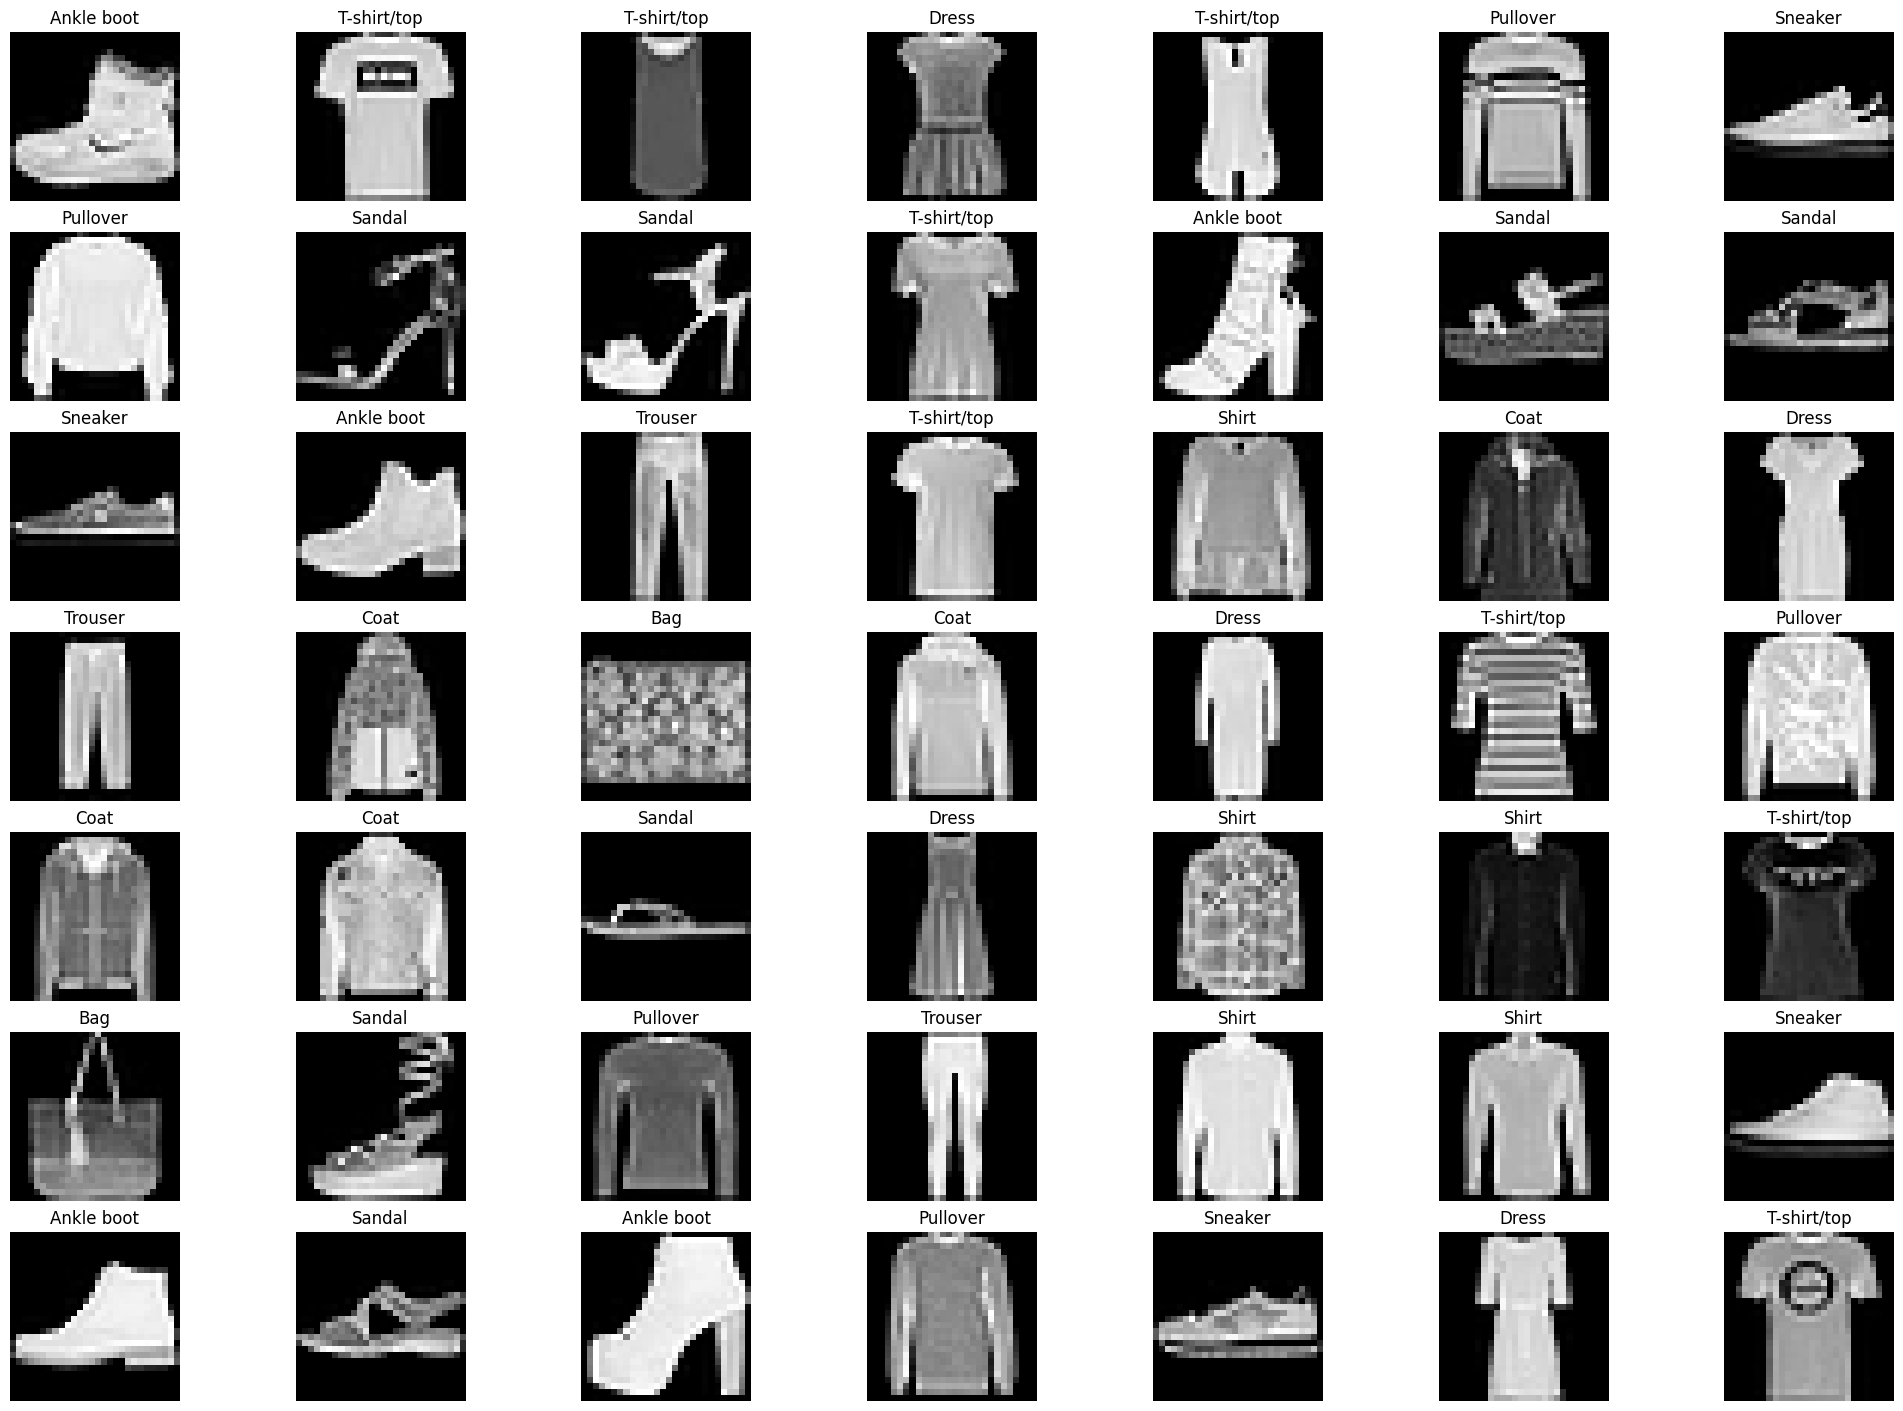

In [26]:
fig, axes = plt.subplots(nrows=7, ncols=7, constrained_layout=True, figsize=(20,14))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(train_data.data[i], cmap="gray")
  ax.set_title(class_names[train_data.targets[i]])
  ax.axis(False)
plt.show()
#plt.tight_layout()
